Silhouette Score for k=3: 0.3752
Silhouette Score for k=4: 0.3292
Silhouette Score for k=5: 0.3028


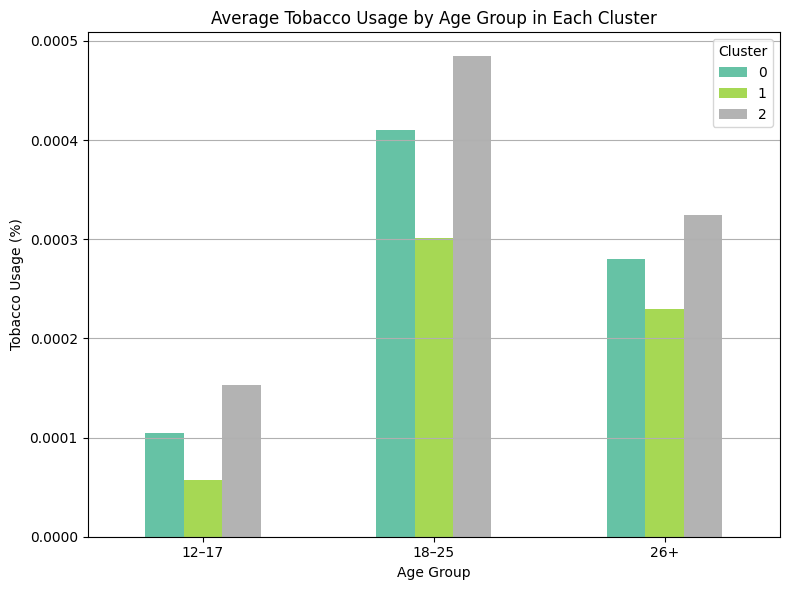

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load dataset
df = pd.read_csv("drugs.csv")

# Calculate tobacco usage percentages
df["Tobacco_12_17_pct"] = df["Totals.Tobacco.Use Past Month.12-17"] / df["Population.12-17"]
df["Tobacco_18_25_pct"] = df["Totals.Tobacco.Use Past Month.18-25"] / df["Population.18-25"]
df["Tobacco_26_plus_pct"] = df["Totals.Tobacco.Use Past Month.26+"] / df["Population.26+"]

# Select features
features = df[["Tobacco_12_17_pct", "Tobacco_18_25_pct", "Tobacco_26_plus_pct"]]

# Standardize
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Find best k using silhouette score
for k in range(3, 6):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    print(f"Silhouette Score for k={k}: {score:.4f}")

# Final model with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original data
df["Cluster"] = kmeans.labels_

# Calculate average tobacco usage percentages by cluster
averages = df.groupby("Cluster")[
    ["Tobacco_12_17_pct", "Tobacco_18_25_pct", "Tobacco_26_plus_pct"]
].mean()

# Rename columns for clarity
averages.columns = ["12–17", "18–25", "26+"]

# Plot
averages.T.plot(kind="bar", figsize=(8, 6), rot=0, colormap="Set2")
plt.title("Average Tobacco Usage by Age Group in Each Cluster")
plt.ylabel("Tobacco Usage (%)")
plt.xlabel("Age Group")
plt.legend(title="Cluster")
plt.tight_layout()
plt.grid(axis="y")
plt.show()
